In [117]:
# ! pip install plotly
# !pip install --upgrade plotly
# ! pip show nbformat
# !pip install pandas

In [118]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import re
import plotly.express as px
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import scipy.stats as stats

In [119]:
df = pd.read_csv("nutrition_final.csv")
df.head()

,Unnamed: 0,category,product,name,natural_form,serving_size,calories,total_fat,saturated_fat,cholesterol,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Grains,Cornstarch,Cornstarch,edible,100 g,381,0.1g,NaN,0,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,Legumes and seeds,Nuts pecans,"Nuts, pecans",edible,100 g,691,72g,6.2g,0,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,Vegetables,Eggplant raw,"Eggplant, raw",raw,100 g,25,0.2g,NaN,0,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,Grains,Teff uncooked,"Teff, uncooked",raw,100 g,367,2.4g,0.4g,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,Fruits,Sherbet orange,"Sherbet, orange",edible,100 g,144,2g,1.2g,1mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [120]:
df.drop(columns=['Unnamed: 0'],axis = 0, inplace= True)
df.columns


Index(['category', 'product', 'name', 'natural_form', 'serving_size',
       'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium',
       'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid',
       'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom',
       'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium',
       'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine',
       'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine',
       'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine',
       'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate',
       'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose',
       'maltose', 'sucrose

In [121]:
df.head(1)

,category,product,name,natural_form,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Grains,Cornstarch,Cornstarch,edible,100 g,381,0.1g,NaN,0,9.00 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g


In [122]:
df.columns

Index(['category', 'product', 'name', 'natural_form', 'serving_size',
       'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium',
       'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid',
       'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom',
       'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium',
       'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine',
       'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine',
       'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine',
       'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate',
       'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose',
       'maltose', 'sucrose

In [123]:
Minerals = df[['product','calcium','copper','irom','magnesium','manganese','phosphorous','potassium','selenium','zink']]
Minerals.head()

,product,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink
0,Cornstarch,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg
1,Nuts pecans,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg
2,Eggplant raw,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg
3,Teff uncooked,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg
4,Sherbet orange,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg


In [124]:
def to_grams(value):
    value = str(value).lower()
    if 'mg' in value:
        return float(value.replace('mg', '').strip()) / 1000
    elif 'mcg' in value:
        return float(value.replace('mcg', '').strip()) / 1000000
    else:
        return float(value)
columns_to_convert = ['calcium', 'copper', 'irom', 'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium', 'zink']
for column in columns_to_convert:
    Minerals[column] = Minerals[column].apply(to_grams)
Minerals.head()
Minerals.dtypes

/var/folders/z9/jtl_p9fs1ynd259y2nmp4bfh0000gn/T/ipykernel_1641/2323003276.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



product         object
calcium        float64
copper         float64
irom           float64
magnesium      float64
manganese      float64
phosphorous    float64
potassium      float64
selenium       float64
zink           float64
dtype: object

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   category                     8789 non-null   object
 1   product                      8789 non-null   object
 2   name                         8789 non-null   object
 3   natural_form                 8789 non-null   object
 4   serving_size                 8789 non-null   object
 5   calories                     8789 non-null   int64 
 6   total_fat                    8789 non-null   object
 7   saturated_fat                7199 non-null   object
 8   cholesterol                  8789 non-null   object
 9   sodium                       8789 non-null   object
 10  choline                      8789 non-null   object
 11  folate                       8789 non-null   object
 12  folic_acid                   8789 non-null   object
 13  niacin                       8789


# Analyze the distribution of key nutritional components


In [126]:
nutrients = df[['category', 'product', 'serving_size', 'calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']]
nutrients.head(-5)

,category,product,serving_size,calories,protein,total_fat,carbohydrate,fiber,sugars
0,Grains,Cornstarch,100 g,381,0.26 g,0.1g,91.27 g,0.9 g,0.00 g
1,Legumes and seeds,Nuts pecans,100 g,691,9.17 g,72g,13.86 g,9.6 g,3.97 g
2,Vegetables,Eggplant raw,100 g,25,0.98 g,0.2g,5.88 g,3.0 g,3.53 g
3,Grains,Teff uncooked,100 g,367,13.30 g,2.4g,73.13 g,8.0 g,1.84 g
4,Fruits,Sherbet orange,100 g,144,1.10 g,2g,30.40 g,1.3 g,24.32 g
...,...,...,...,...,...,...,...,...,...
8779,Red Meat,"Beef braised cooked all grades trimmed to 1/8""...",100 g,289,28.82 g,18g,0.00 g,0.0 g,0.00 g
8780,Red Meat,"Beef raw select trimmed to 1/8"" fat separable ...",100 g,148,22.55 g,6.4g,0.00 g,0.0 g,0.00 g
8781,Red Meat,"Beef raw choice trimmed to 1/8"" fat separable ...",100 g,161,21.62 g,8.3g,0.00 g,0.0 g,0.00 g
8782,Oil,Oil uses similar to 95 degree hard butter conf...,100 g,884,0.00 g,100g,0.00 g,0.0 g,0.00 g


In [127]:
columns_to_convert = ['serving_size' ,'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']

for column in columns_to_convert:
    nutrients[column] = pd.to_numeric(nutrients[column].apply(lambda x: float(re.sub(r'\s*g$', '', x)) if isinstance(x, str) and re.search(r'\s*g$', x) else x))
    
nutrients.head(1)  
# nutrients.to_csv("nutrients.csv", index = False)     


/var/folders/z9/jtl_p9fs1ynd259y2nmp4bfh0000gn/T/ipykernel_1641/1043148987.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category,product,serving_size,calories,protein,total_fat,carbohydrate,fiber,sugars
0,Grains,Cornstarch,100.0,381,0.26,0.1,91.27,0.9,0.0


# 

In [128]:
# nutrients['calories per 100 gm of protien'] =
(nutrients['calories']/nutrients['protein'])
# nutrients.head()

0       1465.384615
1         75.354417
2         25.510204
3         27.593985
4        130.909091
           ...     
8784       5.330490
8785       6.961811
8786      16.547192
8787       5.177578
8788       5.177578
Length: 8789, dtype: float64

In [129]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      8789 non-null   object 
 1   product       8789 non-null   object 
 2   serving_size  8789 non-null   float64
 3   calories      8789 non-null   int64  
 4   protein       8789 non-null   float64
 5   total_fat     8789 non-null   float64
 6   carbohydrate  8789 non-null   float64
 7   fiber         8789 non-null   float64
 8   sugars        8789 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 618.1+ KB


In [130]:
nutrients.isna().sum()

category        0
product         0
serving_size    0
calories        0
protein         0
total_fat       0
carbohydrate    0
fiber           0
sugars          0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Lib

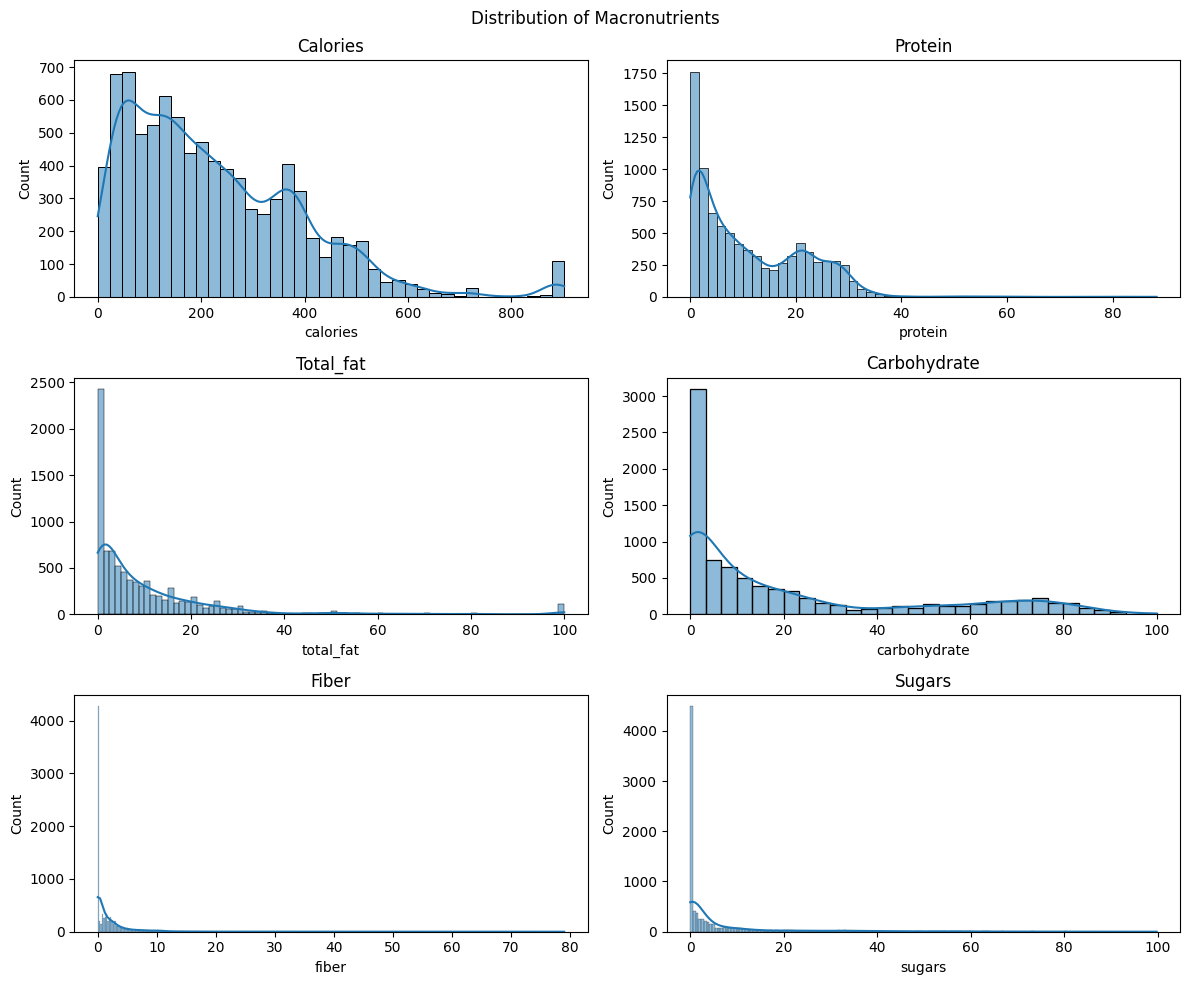

In [131]:
macronutrients = nutrients[['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']]
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Distribution of Macronutrients')

for i, nutrient in enumerate(macronutrients):
    sns.histplot(nutrients[nutrient], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(nutrient.capitalize())

plt.tight_layout()
plt.show()


In [132]:
nutrients['category'].unique()

array(['Grains', 'Legumes and seeds', 'Vegetables', 'Fruits', 'Red Meat',
       'Dairy', 'Sauce', 'Snacks', 'Poultry', 'Condiments', 'Eggs',
       'Miscellaneous Ingredients', 'Seafood', 'Oil', 'Beverages'],
      dtype=object)

# Food with the highest protien overall

In [133]:
protein_rich= nutrients.sort_values(by='protein', ascending= False)
top_20 = protein_rich.head(20)
fig = px.bar(top_20, x='product', y='protein', color='protein', title='Top 10 protein rich foods', width=1000, height=800, text = 'protein', text_auto = '.2f')
fig.show()

# Food with the highest Calories overall

In [134]:
calories_rich= nutrients.sort_values(by='calories', ascending= False)
top_20 = calories_rich.head(20)
fig = px.bar(top_20, x='product', y='calories', color='calories', title='Top 20 calories rich foods', width=1000, height=800, text = 'calories', text_auto = '.2f')
fig.show()

# Food with highest Fat in Overall

In [135]:
fat_rich= nutrients.sort_values(by='total_fat', ascending= False)
top_20 = fat_rich.head(20)
fig = px.bar(top_20, x='product', y='total_fat', color='total_fat', title='Top 20 fat rich foods', width=1000, height=800, text = 'total_fat', text_auto = '.2f')
fig.show()

# Food with highest Carbohyrate in Overall

In [136]:
carbohydrate_rich= nutrients.sort_values(by='carbohydrate', ascending= False)
top_20 = carbohydrate_rich.head(20)
fig = px.bar(top_20, x='product', y='carbohydrate', color='carbohydrate', title='Top 20 carbohydrate rich foods', width=1000, height=800, text = 'carbohydrate', text_auto = '.2f')
fig.show()

# Food with highest Fiber in Overall

In [137]:
fiber_rich= nutrients.sort_values(by='fiber', ascending= False)
top_20 = fiber_rich.head(20)
fig = px.bar(top_20, x='product', y='fiber', color='fiber', title='Top 20 fiber rich foods', width=1000, height=800, text = 'fiber', text_auto = '.2f')
fig.show()

# Food with highest Sugar in Overall

In [138]:
sugar_rich= nutrients.sort_values(by='sugars', ascending= False)
top_20 = sugar_rich.head(20)
fig = px.bar(top_20, x='product', y='sugars', color='sugars', title='Top 20 sugars rich foods', width=1000, height=800, text = 'sugars', text_auto = '.2f')
fig.show()

# Correlation between Nutrients and Minerals

In [139]:
correlation = pd.merge(nutrients, Minerals, on='product', how='left')
correlation.head(-5)

,category,product,serving_size,calories,protein,total_fat,carbohydrate,fiber,sugars,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink
0,Grains,Cornstarch,100.0,381,0.26,0.1,91.27,0.9,0.00,0.002,0.000050,0.00047,0.003,0.000053,0.013,0.003,2.800000e-06,0.00006
1,Legumes and seeds,Nuts pecans,100.0,691,9.17,72.0,13.86,9.6,3.97,0.070,0.001200,0.00253,0.121,0.004500,0.277,0.410,3.800000e-06,0.00453
2,Vegetables,Eggplant raw,100.0,25,0.98,0.2,5.88,3.0,3.53,0.009,0.000081,0.00023,0.014,0.000232,0.024,0.229,3.000000e-07,0.00016
3,Grains,Teff uncooked,100.0,367,13.30,2.4,73.13,8.0,1.84,0.180,0.000810,0.00763,0.184,0.009240,0.429,0.427,4.400000e-06,0.00363
4,Fruits,Sherbet orange,100.0,144,1.10,2.0,30.40,1.3,24.32,0.054,0.000028,0.00014,0.008,0.000011,0.040,0.096,1.500000e-06,0.00048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,Red Meat,"Beef braised cooked all grades trimmed to 1/8""...",100.0,289,28.82,18.0,0.00,0.0,0.00,0.016,0.000100,0.00243,0.019,0.000010,0.175,0.232,2.710000e-05,0.00669
8780,Red Meat,"Beef raw select trimmed to 1/8"" fat separable ...",100.0,148,22.55,6.4,0.00,0.0,0.00,0.005,0.000084,0.00180,0.023,0.000082,0.160,0.297,2.700000e-05,0.00572
8781,Red Meat,"Beef raw choice trimmed to 1/8"" fat separable ...",100.0,161,21.62,8.3,0.00,0.0,0.00,0.007,0.000071,0.00204,0.022,0.000071,0.153,0.262,2.750000e-05,0.00563
8782,Oil,Oil uses similar to 95 degree hard butter conf...,100.0,884,0.00,100.0,0.00,0.0,0.00,0.001,0.000000,0.00015,0.000,0.000000,0.000,0.001,0.000000e+00,0.00008


In [140]:
# Check to identify if duplicate values exist
correlation['product'].value_counts()[correlation['product'].value_counts()>1].sum()

0

# Observation 
duplicate values do not exist in product column

In [141]:
corr_matrix = correlation[['calories','protein','total_fat', 'carbohydrate', 'fiber','sugars', 'calcium','copper','irom','magnesium','manganese','phosphorous','potassium','selenium','zink']].corr()
corr_matrix

,calories,protein,total_fat,carbohydrate,fiber,sugars,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink
calories,1.000000,0.112888,0.806574,0.492915,0.202084,0.315696,0.124456,0.102742,0.195025,0.262749,0.037255,0.200676,0.081798,0.061379,0.113362
protein,0.112888,1.000000,0.062268,-0.303971,-0.073940,-0.269118,0.047325,0.152919,0.129556,0.217898,0.034831,0.443580,0.247964,0.394546,0.423621
total_fat,0.806574,0.062268,1.000000,-0.048740,-0.023065,-0.000315,0.016747,0.048087,-0.036208,0.082391,0.001276,0.074200,-0.036413,0.041510,0.031533
carbohydrate,0.492915,-0.303971,-0.048740,1.000000,0.455886,0.616656,0.188224,0.063419,0.342912,0.283711,0.055458,0.074014,0.117700,-0.117244,-0.016911
fiber,0.202084,-0.073940,-0.023065,0.455886,1.000000,0.107279,0.234415,0.186073,0.381205,0.540410,0.102780,0.160587,0.326475,-0.033551,0.082555
sugars,0.315696,-0.269118,-0.000315,0.616656,0.107279,1.000000,0.124171,-0.005189,0.110971,0.040583,0.010016,-0.052985,-0.005961,-0.130163,-0.031463
calcium,0.124456,0.047325,0.016747,0.188224,0.234415,0.124171,1.000000,0.083369,0.351724,0.310880,0.067743,0.566595,0.251893,0.011666,0.142048
copper,0.102742,0.152919,0.048087,0.063419,0.186073,-0.005189,0.083369,1.000000,0.182379,0.338116,0.167562,0.215385,0.201827,0.125273,0.262852
irom,0.195025,0.129556,-0.036208,0.342912,0.381205,0.110971,0.351724,0.182379,1.000000,0.399753,0.093274,0.222629,0.230604,0.066216,0.382486
magnesium,0.262749,0.217898,0.082391,0.283711,0.540410,0.040583,0.310880,0.338116,0.399753,1.000000,0.175457,0.437532,0.505331,0.135740,0.261569


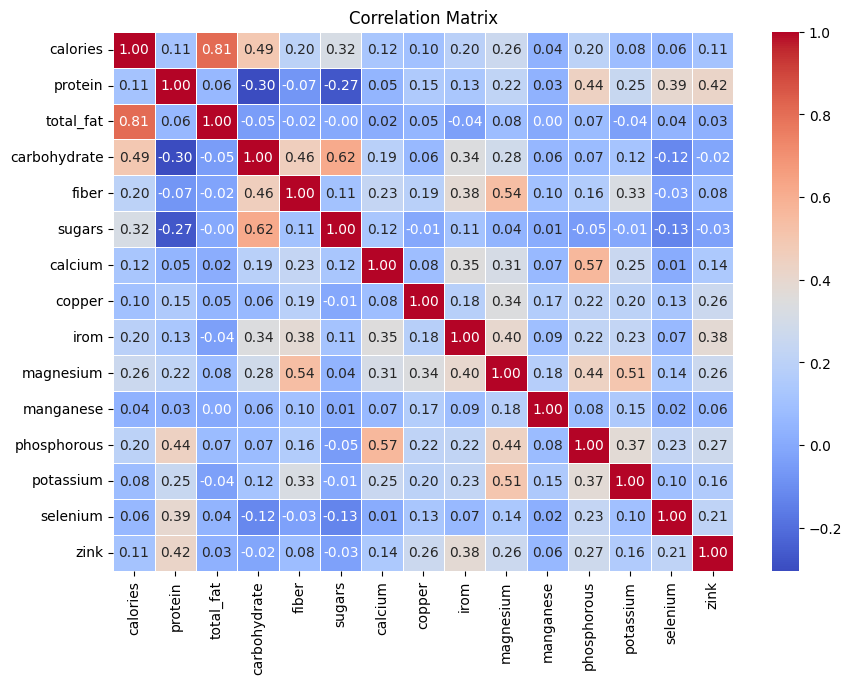

In [142]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Observation
1. The correlation between calories and total_fat is high
2. The correlation betweem sugars and carbohyrates is high
3. The correlation betweem carbohrdrate and protein is low
4. The correlation betweem sugars and protein is low







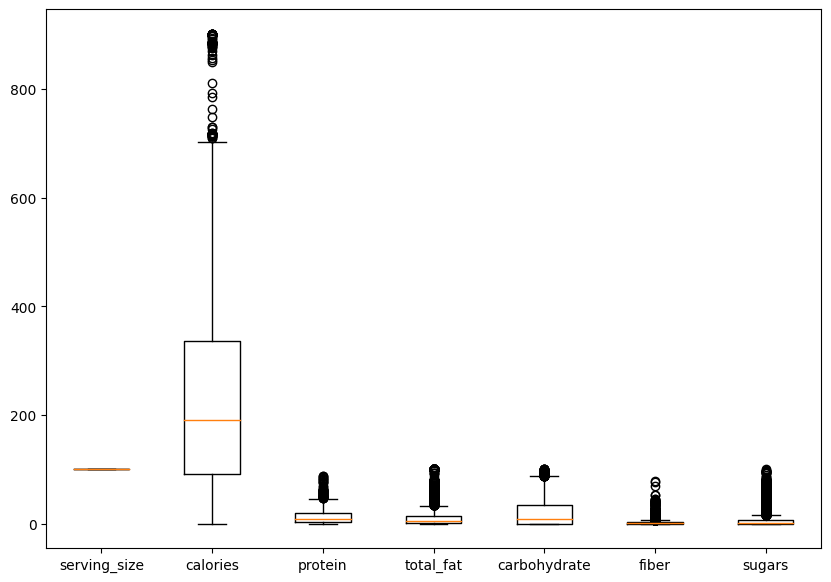

In [143]:
# nutrients.head()
fig = plt.figure(figsize=(10,7))
data = nutrients.columns[2:]    

plt.boxplot(nutrients[data], labels=data)
plt.show()
    

In [144]:
nutrients.head()

,category,product,serving_size,calories,protein,total_fat,carbohydrate,fiber,sugars
0,Grains,Cornstarch,100.0,381,0.26,0.1,91.27,0.9,0.00
1,Legumes and seeds,Nuts pecans,100.0,691,9.17,72.0,13.86,9.6,3.97
2,Vegetables,Eggplant raw,100.0,25,0.98,0.2,5.88,3.0,3.53
3,Grains,Teff uncooked,100.0,367,13.30,2.4,73.13,8.0,1.84
4,Fruits,Sherbet orange,100.0,144,1.10,2.0,30.40,1.3,24.32


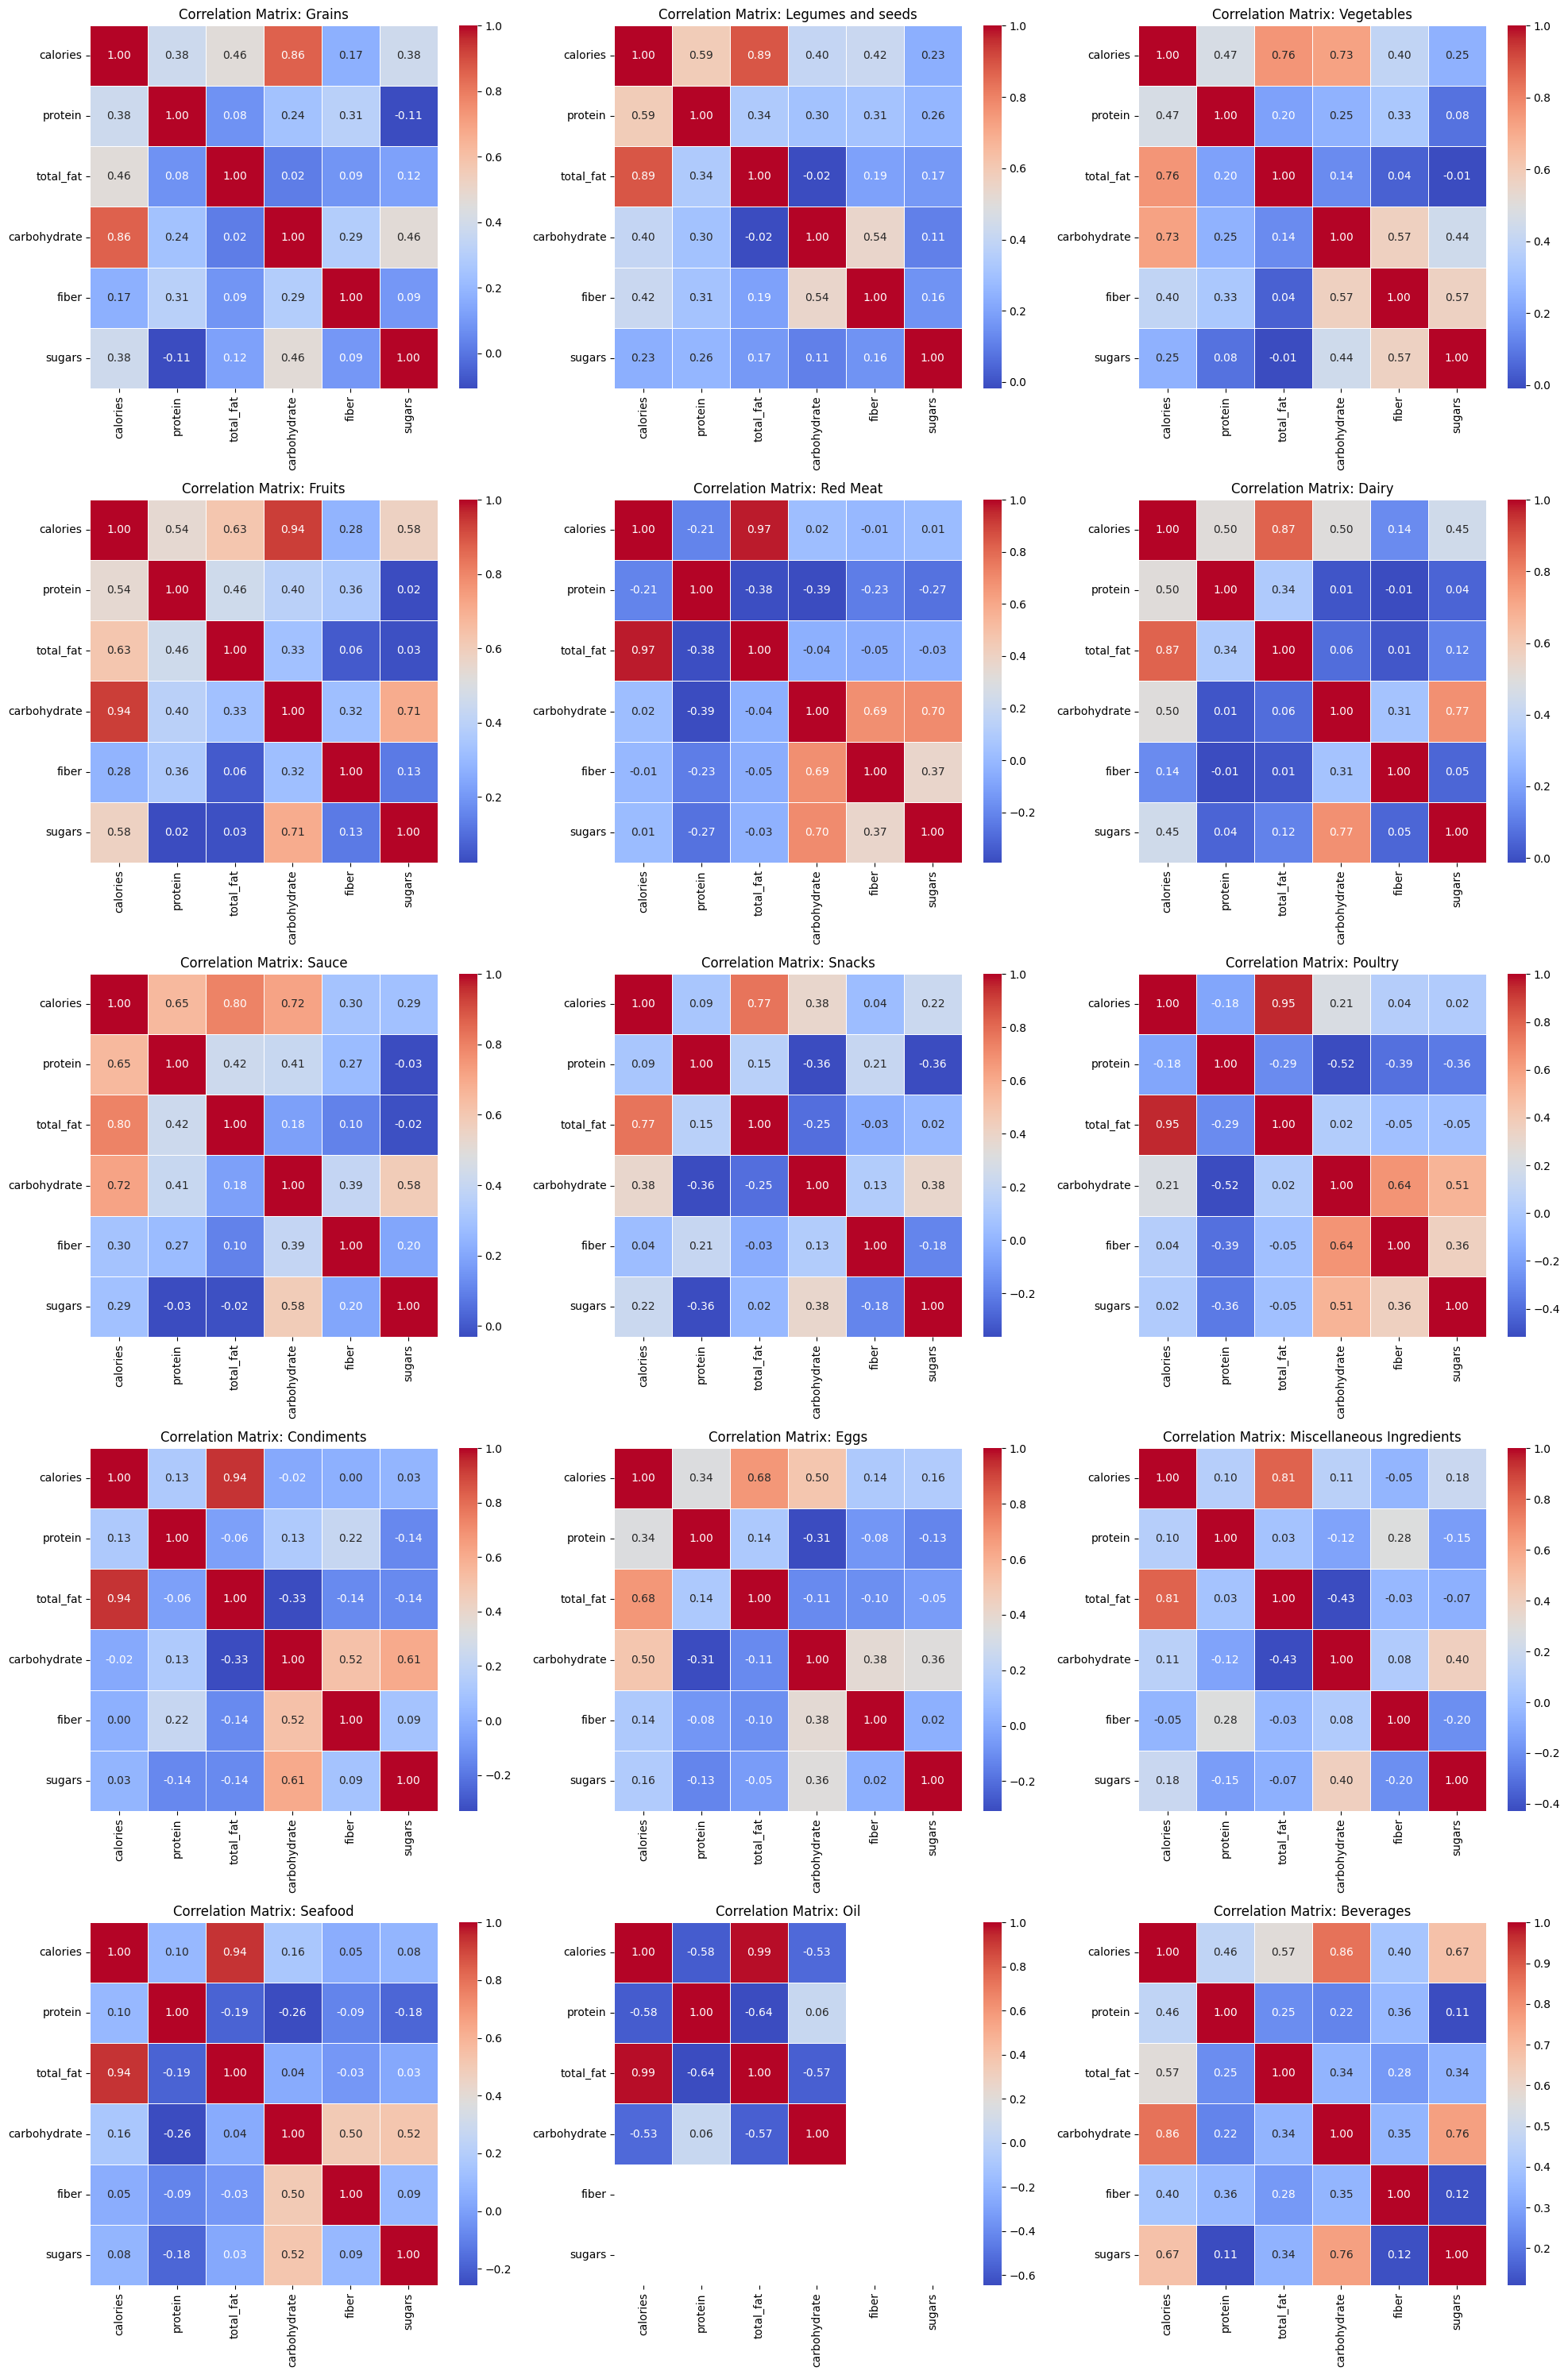

In [145]:
category_list = nutrients['category'].unique().tolist()
rows = math.ceil(len(category_list) / 3)
fig, axs = plt.subplots(rows, 3, figsize=(20, rows * 6))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Loop through categories and plot heatmaps
for idx, i in enumerate(category_list):
    # Filter data for the current category
    frame = nutrients[nutrients["category"] == i][['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']]
    
    # Reset index
    frame = frame.reset_index(drop=True)
    
    # Compute the correlation matrix
    corr_matrix = frame.corr()
    
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(corr_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=.5,
                ax=axs[idx])
    
    # Set title for this subplot
    axs[idx].set_title(f'Correlation Matrix: {i}')
plt.tight_layout()

# Show the plot
plt.show()

# need to add in the observations

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Fra

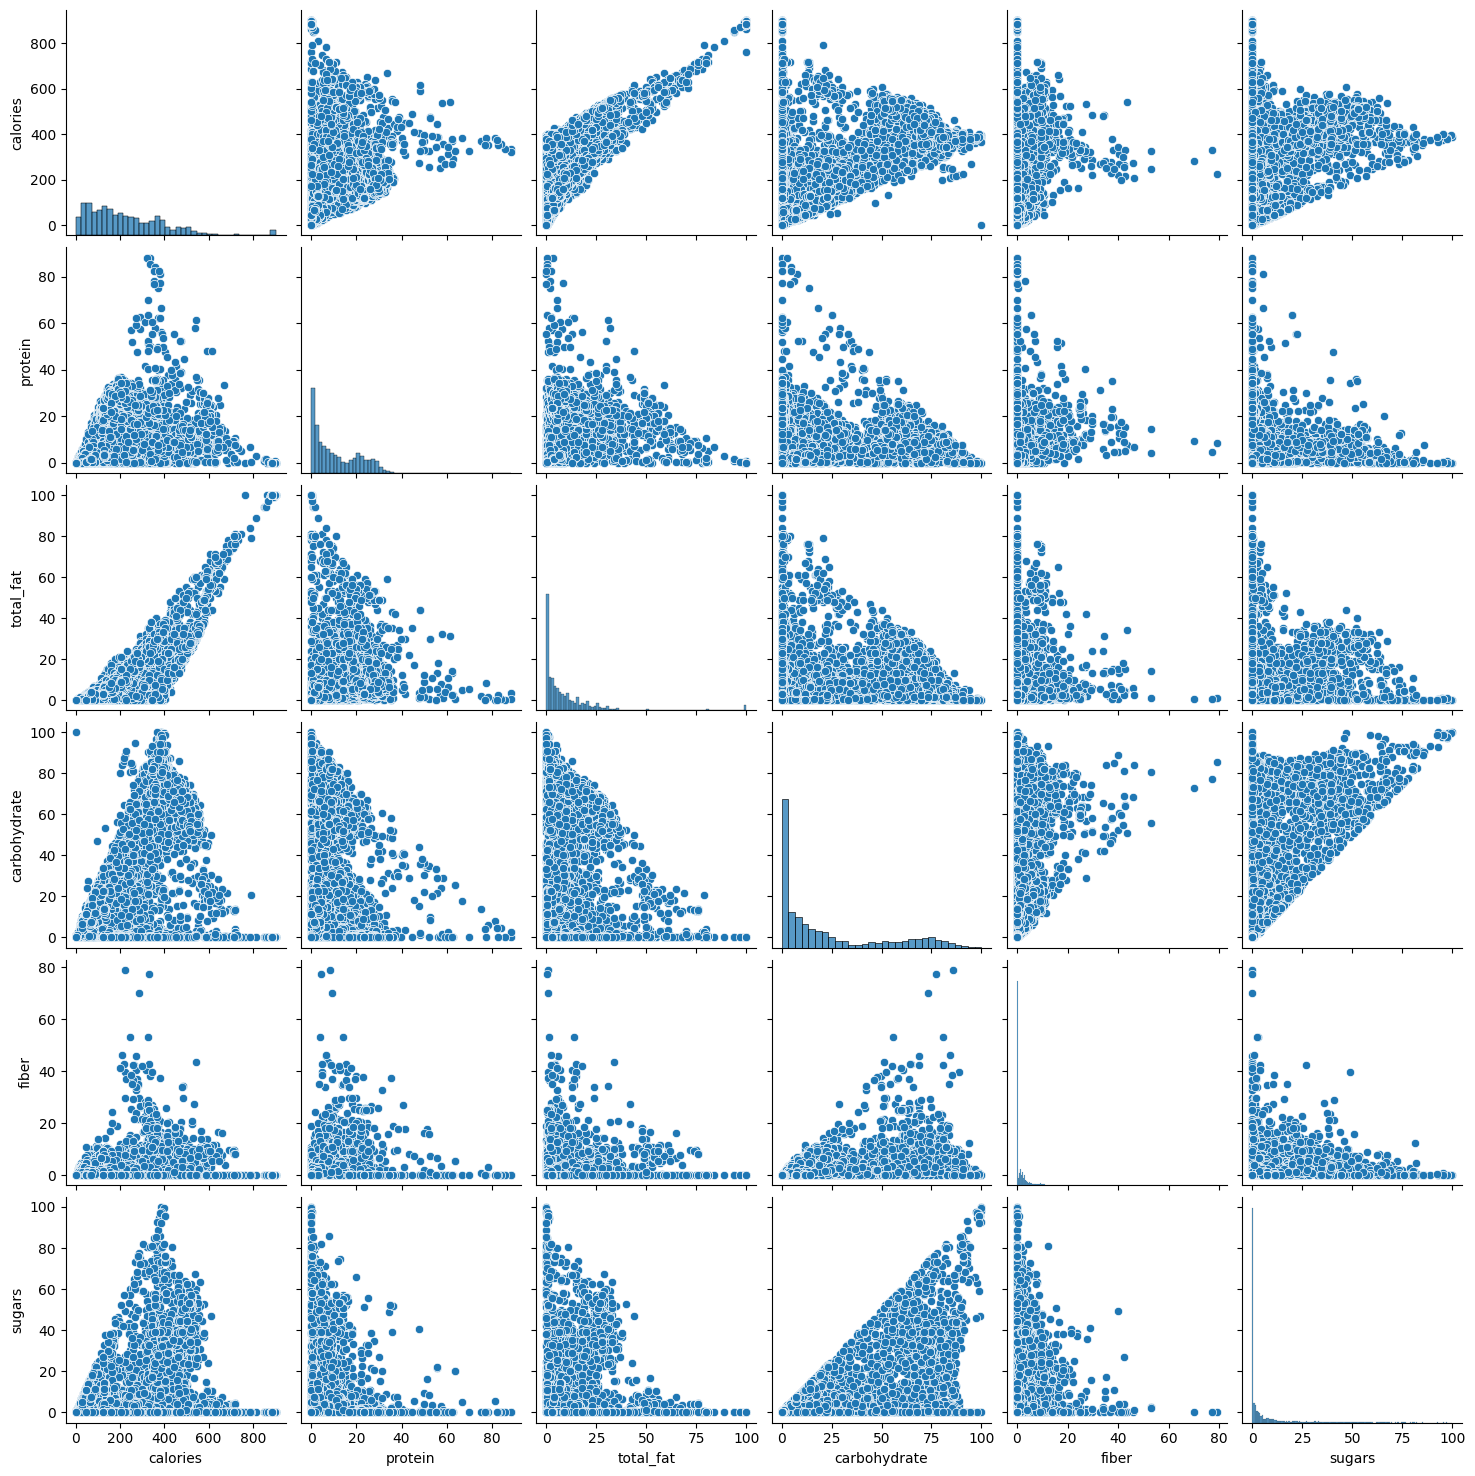

In [199]:
sns.pairplot(nutrients[['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']])

In [179]:
x_axis = nutrients['category'].unique().tolist()
y_axis = nutrients[['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']]

avg = pd.DataFrame(nutrients.groupby('category')[['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']].mean())
avg.reset_index(inplace=True)
avg.drop('calories',axis=1, inplace=True)
avg.head()

,category,protein,total_fat,carbohydrate,fiber,sugars
0,Beverages,2.382903,1.164020,18.125782,0.645161,11.106725
1,Condiments,5.874211,17.859649,16.961111,2.159357,5.545439
2,Dairy,8.476092,10.955882,17.694139,0.449370,10.940315
3,Eggs,10.662305,10.432422,28.946680,1.715625,4.553164
4,Fruits,1.329153,1.493651,25.479365,1.948325,13.915873


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



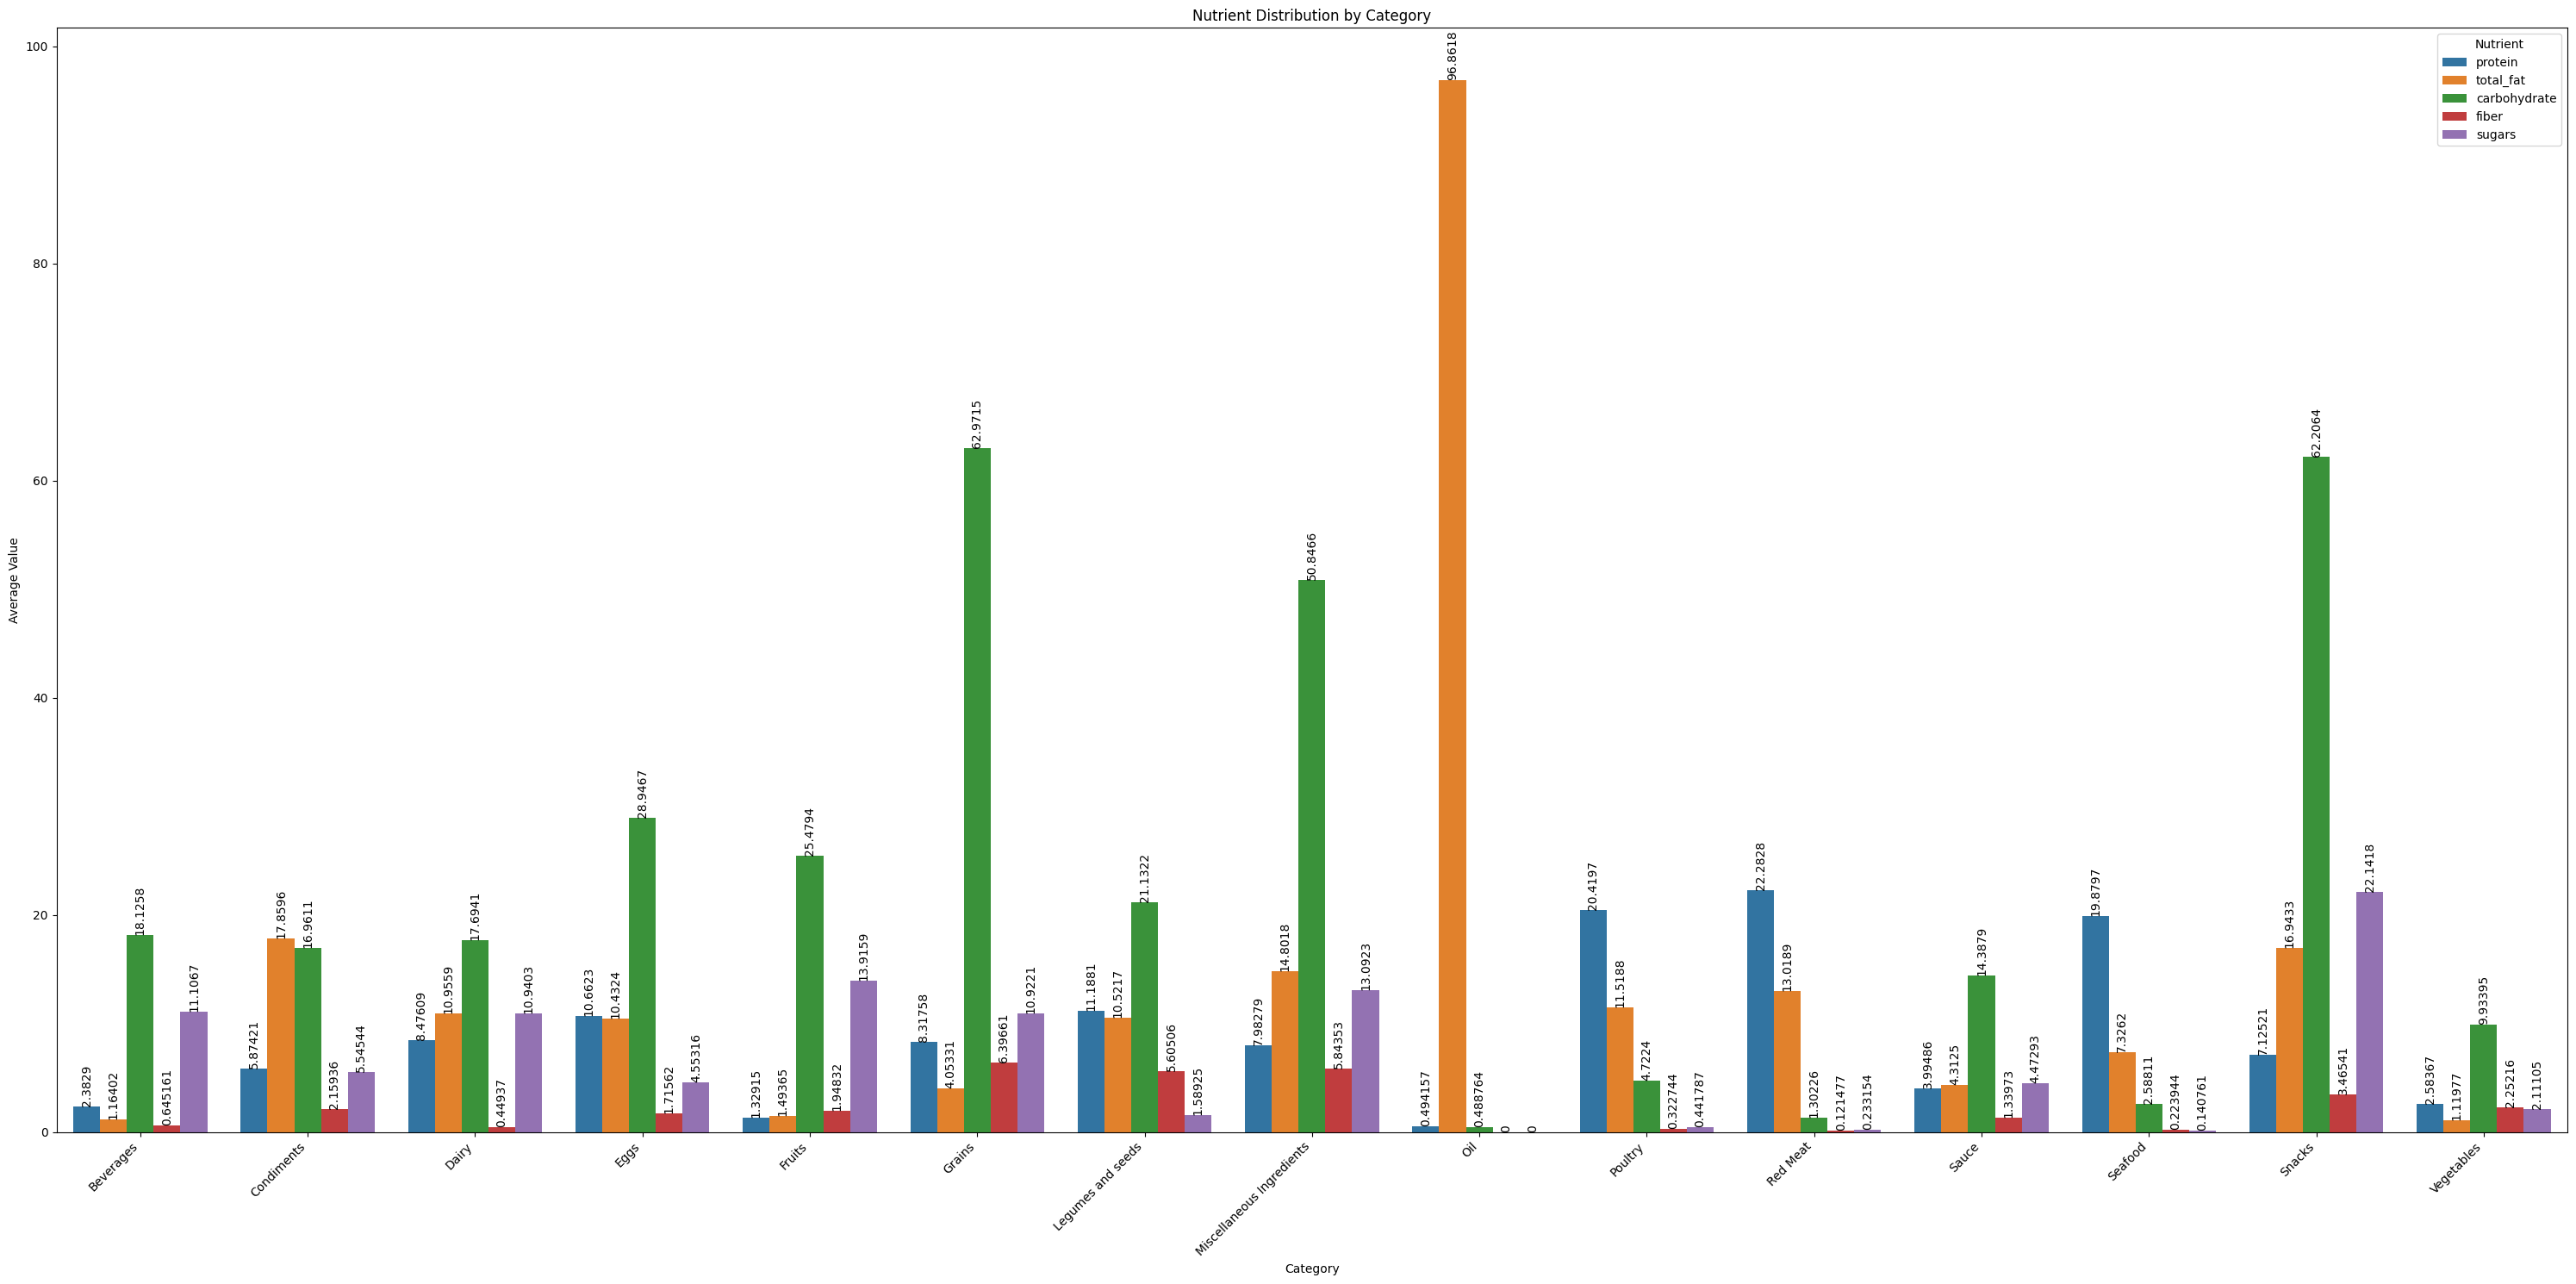

In [180]:
long_nutrients = pd.melt(
    avg,
    id_vars='category',
    value_vars=['protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars'],
    var_name='Nutrient',
    value_name='Value'
)

# Plot using Seaborn
plt.figure(figsize=(30, 15))
ax = sns.barplot(data=long_nutrients, x='category', y='Value', hue='Nutrient', estimator='mean')
for container in ax.containers:
    ax.bar_label(container,rotation=90)
# Add labels and title
plt.title('Nutrient Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.legend(title='Nutrient')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [181]:
nut = nutrients[['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']]
nut.std()

calories        169.862001
protein          10.530602
total_fat        15.818247
carbohydrate     27.266261
fiber             4.269181
sugars           13.718890
dtype: float64

In [182]:
nut.fillna(nut.mean(), inplace=True)

/var/folders/z9/jtl_p9fs1ynd259y2nmp4bfh0000gn/T/ipykernel_1641/2655135272.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Normalize_feature = scaler.fit_transform(nut)
normalized_df = pd.DataFrame(Normalize_feature, columns=nut.columns)
normalized_df.std()

calories        1.000057
protein         1.000057
total_fat       1.000057
carbohydrate    1.000057
fiber           1.000057
sugars          1.000057
dtype: float64

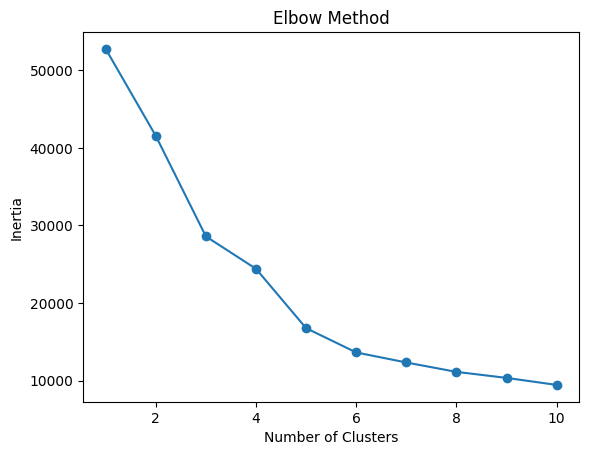

In [184]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Normalize_feature)
    inertia.append(kmeans.inertia_)

# Plot inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [185]:
optimal_k = 6  # Replace this with your chosen value from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(Normalize_feature)

# Add cluster labels to original dataframe
nut['Cluster'] = clusters

/var/folders/z9/jtl_p9fs1ynd259y2nmp4bfh0000gn/T/ipykernel_1641/797831416.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [186]:
cluster_analysis = nut.groupby('Cluster').mean()
print(cluster_analysis)

           calories    protein  total_fat  carbohydrate      fiber     sugars
Cluster                                                                      
0         78.726054   2.833052   2.091922     12.298439   1.506609   4.147181
1        340.944444  15.698704   8.450000     62.688765  24.362963   8.210123
2        362.942922   8.598006  10.304718     60.890814   4.349011   6.138037
3        208.548515  23.013693  11.533333      2.431360   0.193927   0.401017
4        692.603448   7.931149  72.247126      7.290603   2.439080   1.456552
5        419.889166   5.617684  13.991283     69.539900   2.632254  43.928655


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



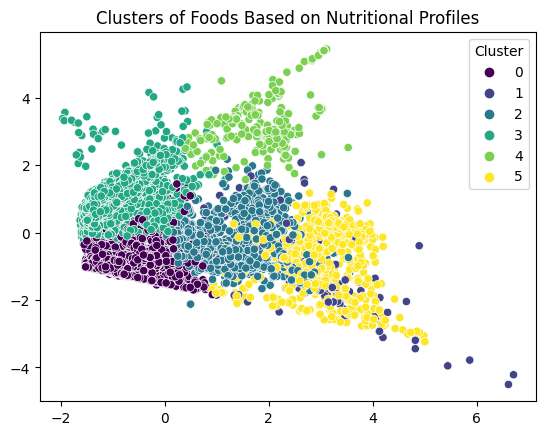

In [187]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(Normalize_feature)

# Scatter plot of clusters
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=nut['Cluster'], palette='viridis')
plt.title('Clusters of Foods Based on Nutritional Profiles')
plt.show()

In [188]:
nut.head()

,calories,protein,total_fat,carbohydrate,fiber,sugars,Cluster
0,381,0.26,0.1,91.27,0.9,0.00,2
1,691,9.17,72.0,13.86,9.6,3.97,4
2,25,0.98,0.2,5.88,3.0,3.53,0
3,367,13.30,2.4,73.13,8.0,1.84,2
4,144,1.10,2.0,30.40,1.3,24.32,0


In [189]:
def five_num_summary(data):
    return np.percentile(data, [0, 25, 50, 75, 100], method="midpoint")
columns = ['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']
nutrient_percentile = []
for col in columns:
    print(nut[col])
    data = five_num_summary(nut[col])
    nutrient_percentile.append(data)
print(nutrient_percentile)

0       381
1       691
2        25
3       367
4       144
       ... 
8784    125
8785    206
8786    277
8787    121
8788    121
Name: calories, Length: 8789, dtype: int64
0        0.26
1        9.17
2        0.98
3       13.30
4        1.10
        ...  
8784    23.45
8785    29.59
8786    16.74
8787    23.37
8788    23.37
Name: protein, Length: 8789, dtype: float64
0        0.1
1       72.0
2        0.2
3        2.4
4        2.0
        ... 
8784     3.5
8785     8.9
8786    23.0
8787     3.0
8788     3.0
Name: total_fat, Length: 8789, dtype: float64
0       91.27
1       13.86
2        5.88
3       73.13
4       30.40
        ...  
8784     0.00
8785     0.00
8786     0.00
8787     0.00
8788     0.00
Name: carbohydrate, Length: 8789, dtype: float64
0       0.9
1       9.6
2       3.0
3       8.0
4       1.3
       ... 
8784    0.0
8785    0.0
8786    0.0
8787    0.0
8788    0.0
Name: fiber, Length: 8789, dtype: float64
0        0.00
1        3.97
2        3.53
3        1.84
4    

In [190]:
means = nut.mean()
std = nut.std()

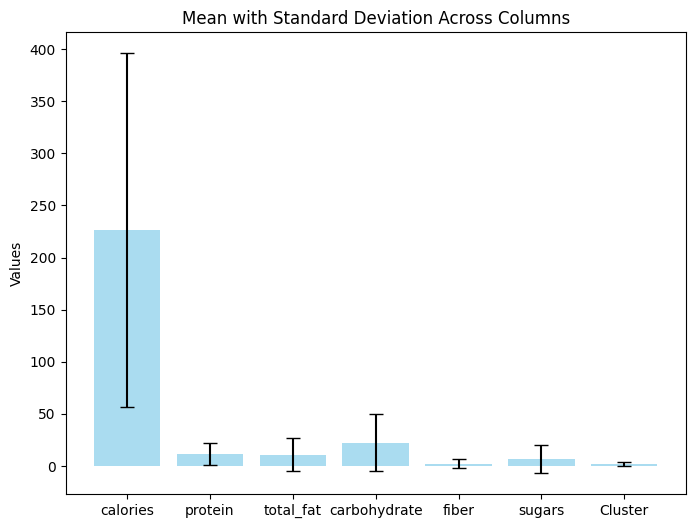

In [191]:
plt.figure(figsize=(8,6))
x = range(len(nut.columns))

plt.bar(x, means, yerr=std, capsize=5, alpha=0.7, color='skyblue')
plt.xticks(x, nut.columns)
plt.ylabel('Values')
plt.title('Mean with Standard Deviation Across Columns')

plt.show()

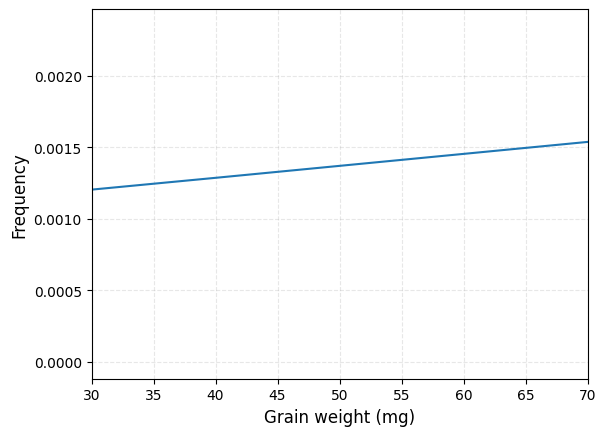

In [192]:
means = nut['calories'].mean()
std = nut['calories'].std()
pdf = stats.norm.pdf(nut["calories"].sort_values(), means, std)

# Drawing a graph
plt.plot(nut["calories"].sort_values(), pdf)
plt.xlim([30,70])  
plt.xlabel("Grain weight (mg)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [193]:
nut.columns

Index(['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars',
       'Cluster'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



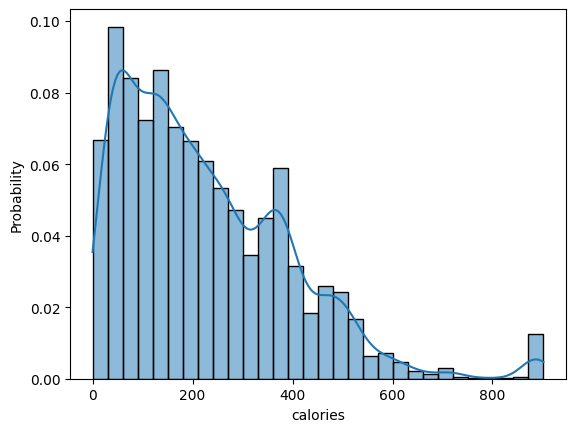

In [194]:
# for col in nut.columns:
sns.histplot(nut['calories'], bins=30, kde=True, stat='probability')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



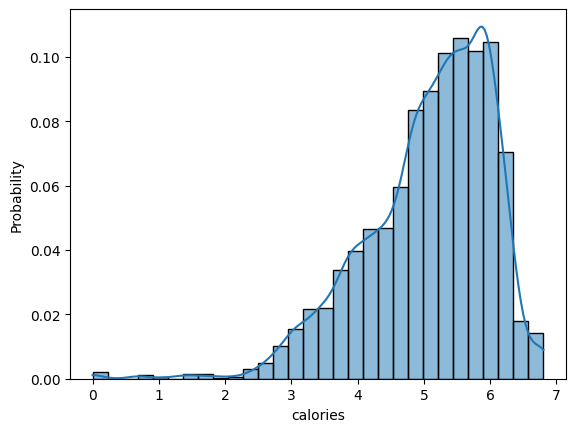

In [195]:
data_log = np.log(nut['calories'])
data_log
sns.histplot(np.log(nut['calories']), bins=30, kde=True, stat='probability')
plt.show()

In [196]:
from scipy.stats import boxcox

for 
calories = df['calories'].dropna()
calories = calories[calories > 0]
calories_boxcox, fitted_lambda = boxcox(calories)
print(calories_boxcox, fitted_lambda)

SyntaxError: invalid syntax (3175970613.py, line 3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



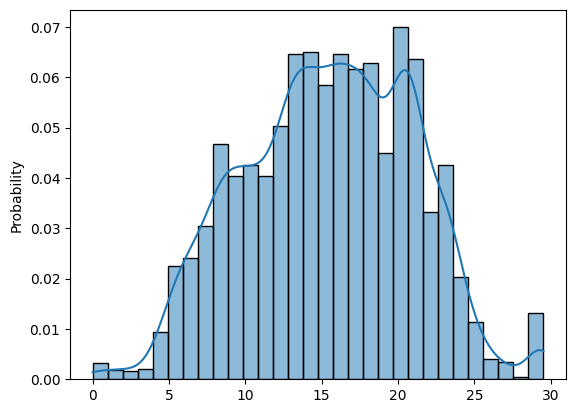

In [ ]:
sns.histplot(calories_boxcox, bins=30, kde=True, stat='probability')
plt.show()

In [ ]:
s